In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.impute import SimpleImputer
from google.colab import files
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [3]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

In [4]:
!gdown 15CFYkH2LCi99v5qhHYJI_kOIlD3ZwFKu

Downloading...
From: https://drive.google.com/uc?id=15CFYkH2LCi99v5qhHYJI_kOIlD3ZwFKu
To: /content/train.csv
100% 14.5M/14.5M [00:00<00:00, 40.7MB/s]


In [5]:
!gdown 1eFnD0MFwRzKUQ7vITQYJfKJosmLREjyS

Downloading...
From: https://drive.google.com/uc?id=1eFnD0MFwRzKUQ7vITQYJfKJosmLREjyS
To: /content/test.csv
100% 5.67M/5.67M [00:00<00:00, 81.1MB/s]


In [6]:
df = pd.read_csv('train.csv')
display (df)

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


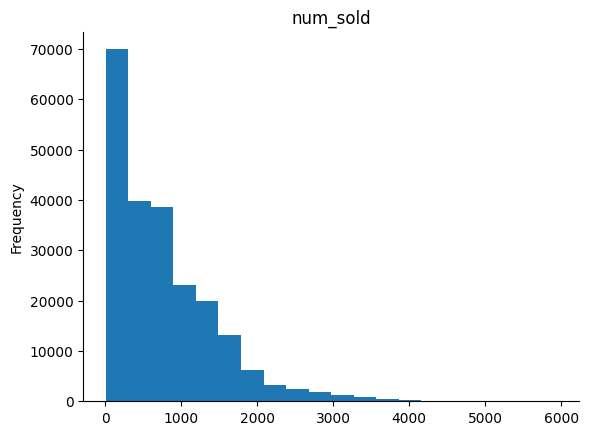

In [7]:
from matplotlib import pyplot as plt
df['num_sold'].plot(kind='hist', bins=20, title='num_sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
print(df.isnull().sum())

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64


In [9]:
num_sold_stats = {
    "mean": df['num_sold'].mean(),
    "median": df['num_sold'].median(),
    "std_dev": df['num_sold'].std()
}
print("Overall Statistics for 'num_sold':")
print(num_sold_stats)

Overall Statistics for 'num_sold':
{'mean': 752.527381937006, 'median': 605.0, 'std_dev': 690.1654449849631}


In [10]:
df = df.dropna()

In [11]:
df

,id,date,country,store,product,num_sold
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [12]:
print(df.isnull().sum())

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64


In [13]:
grouped_stats = df.groupby(['country', 'store', 'product'])['num_sold'].agg(['mean', 'median', 'std']).reset_index()

print("\nGrouped Statistics (Country, Store, Product):")
print(grouped_stats)


Grouped Statistics (Country, Store, Product):
      country                 store             product         mean  median  \
0      Canada     Discount Stickers              Kaggle   715.652718   707.0   
1      Canada     Discount Stickers        Kaggle Tiers   592.579194   584.0   
2      Canada     Discount Stickers            Kerneler   323.602113   319.0   
3      Canada     Discount Stickers  Kerneler Dark Mode   377.781776   371.0   
4      Canada  Premium Sticker Mart   Holographic Goose   248.382177   242.0   
..        ...                   ...                 ...          ...     ...   
83  Singapore     Stickers for Less   Holographic Goose   229.463043   226.0   
84  Singapore     Stickers for Less              Kaggle  1643.064138  1631.0   
85  Singapore     Stickers for Less        Kaggle Tiers  1356.942120  1340.0   
86  Singapore     Stickers for Less            Kerneler   741.365663   734.0   
87  Singapore     Stickers for Less  Kerneler Dark Mode   867.225655   85

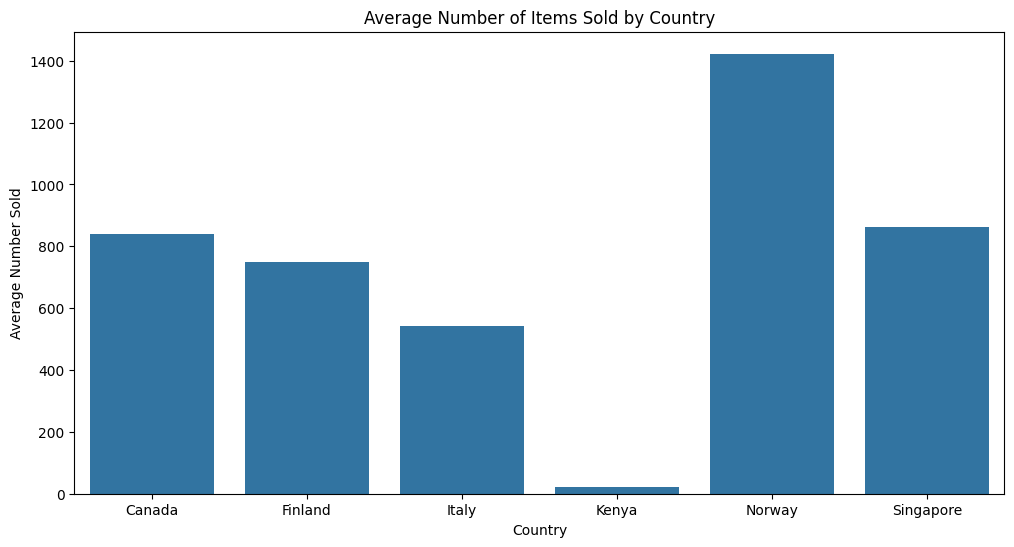

In [14]:
# Bar plot: Average number sold by country
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='country', y='num_sold', errorbar=None)
plt.title('Average Number of Items Sold by Country')
plt.xlabel('Country')
plt.ylabel('Average Number Sold')
plt.show()

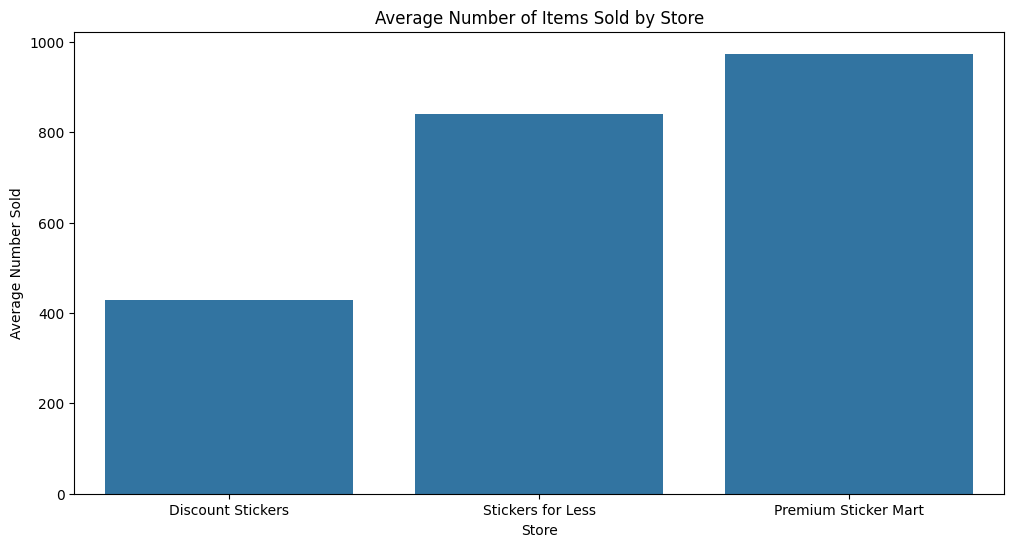

In [15]:
# Bar plot: Average number sold by store
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='store', y='num_sold', errorbar=None)
plt.title('Average Number of Items Sold by Store')
plt.xlabel('Store')
plt.ylabel('Average Number Sold')
plt.show()


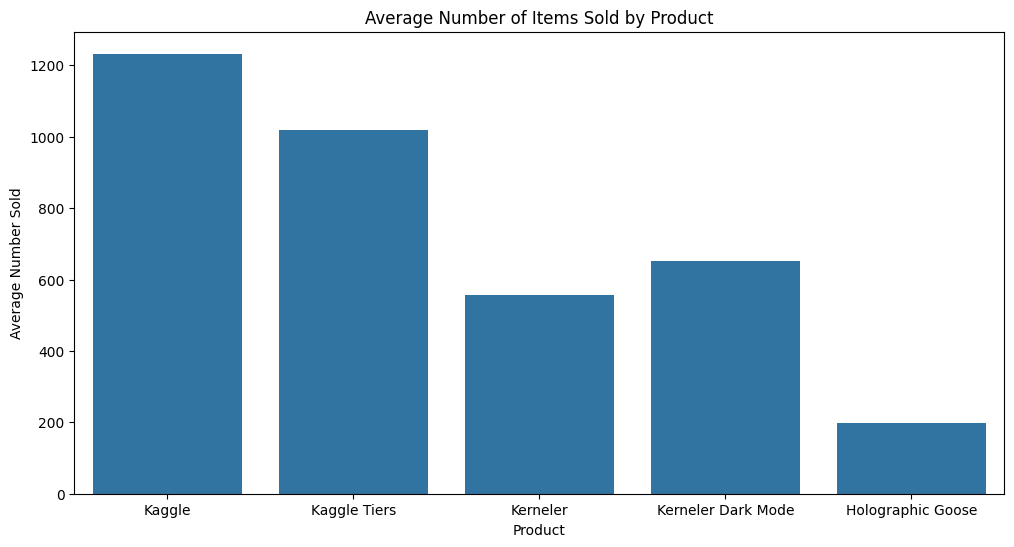

In [16]:
# Bar plot: Average number sold by product
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='product', y='num_sold', errorbar=None)
plt.title('Average Number of Items Sold by Product')
plt.xlabel('Product')
plt.ylabel('Average Number Sold')
plt.show()

In [17]:
# Pivot table: Average number of items sold by country and store
pivot_country_store = df.pivot_table(values='num_sold', index='country', columns='store', aggfunc='mean')

# Pivot table: Average number of items sold by country and product
pivot_country_product = df.pivot_table(values='num_sold', index='country', columns='product', aggfunc='mean')

# Pivot table: Average number of items sold by store and product
pivot_store_product = df.pivot_table(values='num_sold', index='store', columns='product', aggfunc='mean')

# Display pivot tables
print("Pivot Table: Average Sales by Country and Store")
print(pivot_country_store)

print("\nPivot Table: Average Sales by Country and Product")
print(pivot_country_product)

print("Pivot Table: Average Sales by Store and Product")
print(pivot_store_product)


Pivot Table: Average Sales by Country and Store
store      Discount Stickers  Premium Sticker Mart  Stickers for Less
country                                                              
Canada            502.421433           1034.500282         930.718393
Finland           414.561830            991.446304         838.721783
Italy             300.294955            718.715839         607.713414
Kenya              11.945691             25.503995          22.589656
Norway            788.472429           1883.838092        1595.370747
Singapore         478.646304           1142.898709         967.612124

Pivot Table: Average Sales by Country and Product
product    Holographic Goose       Kaggle  Kaggle Tiers     Kerneler  \
country                                                                
Canada            241.249270  1292.282753   1069.633034   583.854759   
Finland           177.405944  1270.898709   1048.214574   572.768609   
Italy             128.415852   920.549602    760.7455

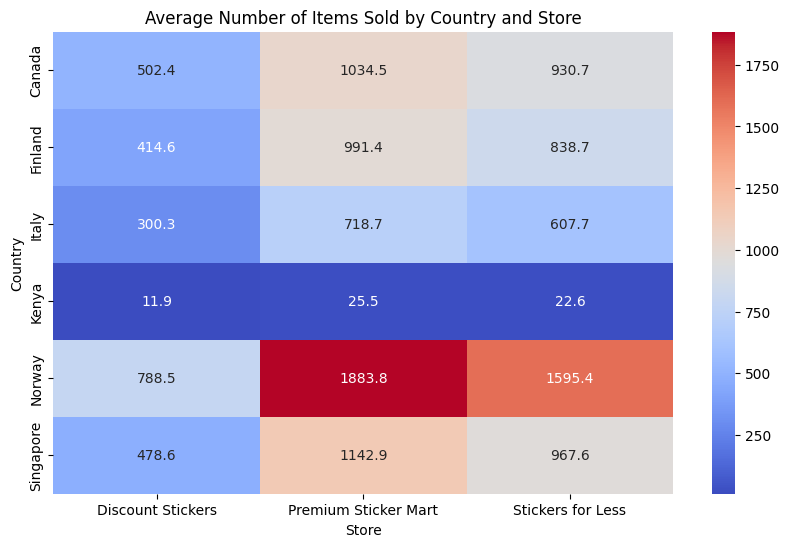

In [18]:
# Heatmap: Average number of items sold by country and store
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_country_store, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Average Number of Items Sold by Country and Store')
plt.xlabel('Store')
plt.ylabel('Country')
plt.show()


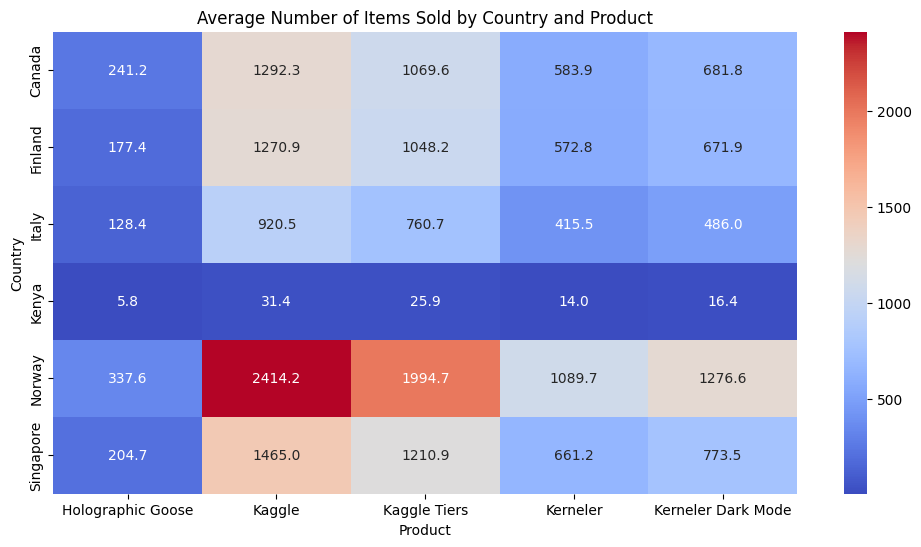

In [19]:
# Heatmap: Average number of items sold by country and product
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_country_product, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Average Number of Items Sold by Country and Product')
plt.xlabel('Product')
plt.ylabel('Country')
plt.show()


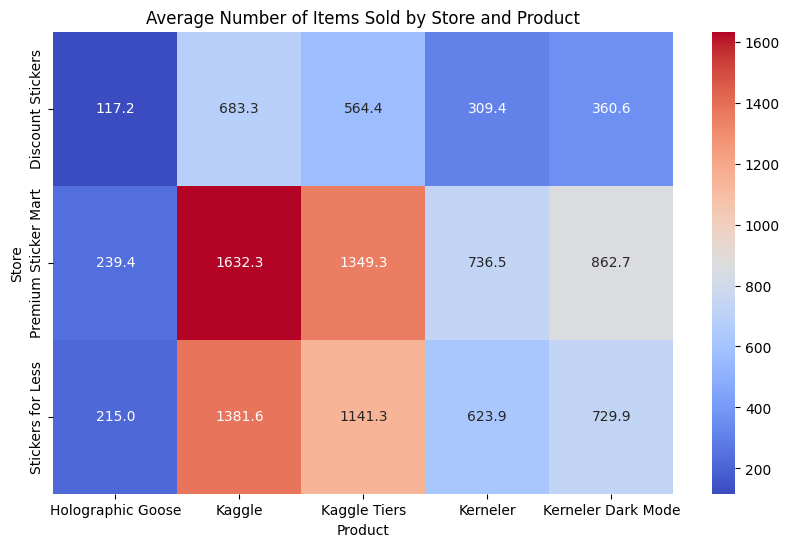

In [20]:
# Heatmap: Average number of items sold by store and product
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_store_product, annot=True, fmt=".1f", cmap="coolwarm")
plt.title('Average Number of Items Sold by Store and Product')
plt.xlabel('Product')
plt.ylabel('Store')
plt.show()

In [21]:
df['date'] = pd.to_datetime(df['date'])

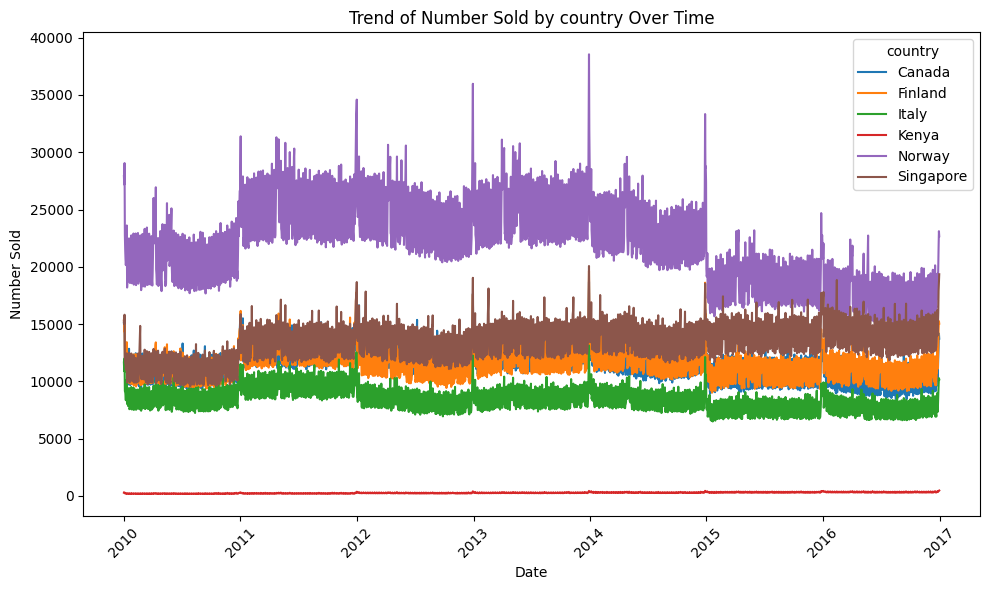

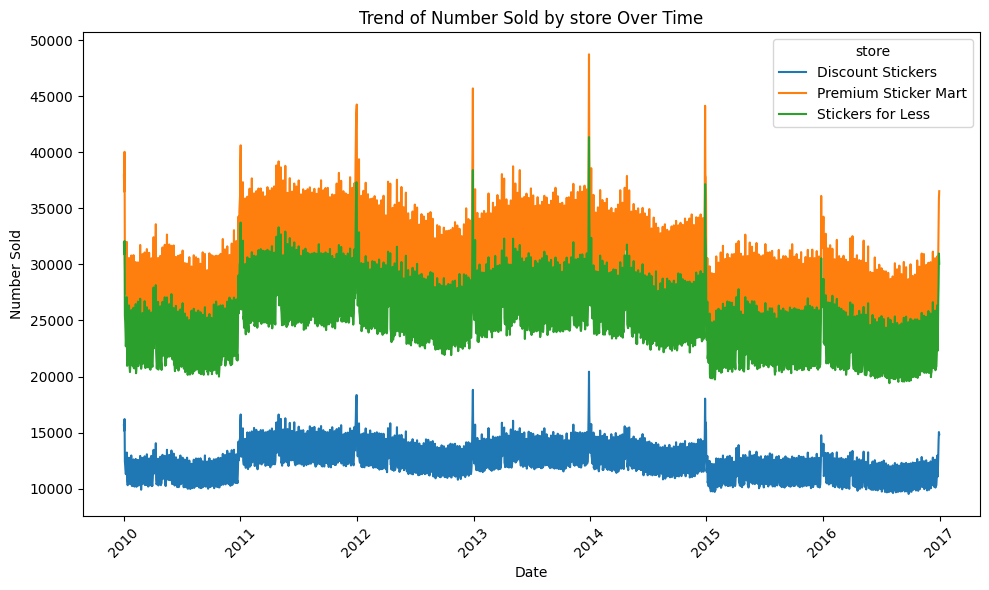

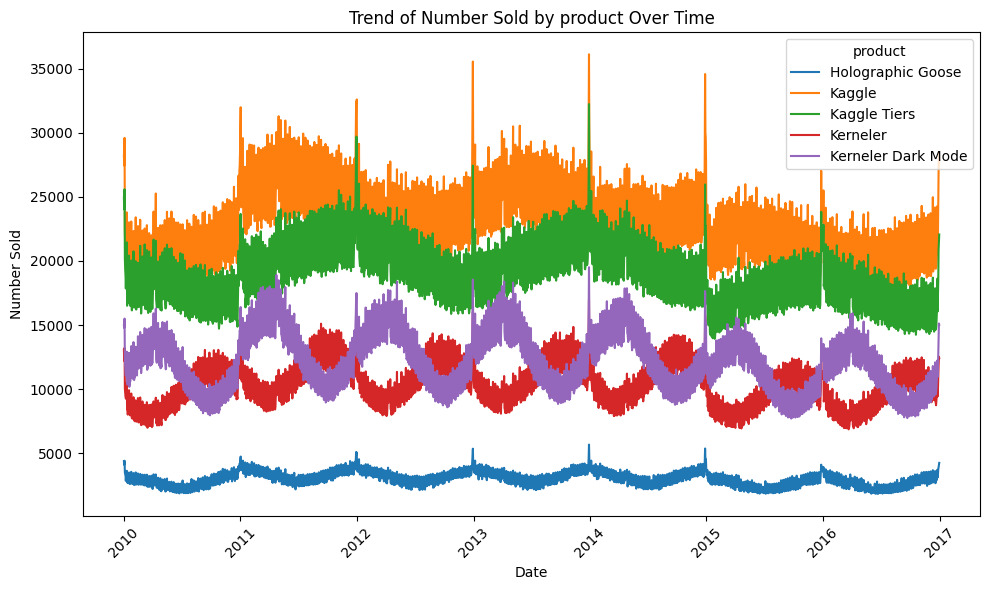

In [22]:
# Loop through each categorical column and plot a line chart
categorical_columns1 = ['country', 'store', 'product']

for category in categorical_columns1:
    plt.figure(figsize=(10, 6))

    # Group by date and category, then sum or average `num_sold`
    grouped_data = df.groupby(['date', category])['num_sold'].sum().reset_index()

    # Get unique category values
    unique_categories = grouped_data[category].unique()

    # Plot each category's trend over time
    for value in unique_categories:
        subset = grouped_data[grouped_data[category] == value]
        plt.plot(subset['date'], subset['num_sold'], label=value)

    # Customize the plot
    plt.title(f'Trend of Number Sold by {category} Over Time')
    plt.ylabel('Number Sold')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.legend(title=category)
    plt.tight_layout()
    plt.show()

In [23]:
#df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [24]:
# Extract features from the 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

In [25]:
# Adding Seasonality
df['season'] = df['month'].apply(lambda x:
                                     'Winter' if x in [12, 1, 2] else
                                     'Spring' if x in [3, 4, 5] else
                                     'Summer' if x in [6, 7, 8] else
                                     'Fall')





In [26]:
# Adding Holiday Indicator (example for Christmas and New Year's)
df['is_holiday'] = df['date'].isin(['2021-12-25', '2021-12-31', '2021-01-01']).astype(int)

<ipython-input-26-64290a857455>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['is_holiday'] = df['date'].isin(['2021-12-25', '2021-12-31', '2021-01-01']).astype(int)


In [27]:
# Adding Weekday vs. Weekend
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)


In [28]:
df

,id,date,country,store,product,num_sold,year,month,day_of_week,season,is_holiday,is_weekend
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0,2010,1,4,Winter,0,0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,4,Winter,0,0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0,2010,1,4,Winter,0,0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,4,Winter,0,0
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,4,Winter,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0,2016,12,5,Winter,0,1
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0,2016,12,5,Winter,0,1
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,12,5,Winter,0,1
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0,2016,12,5,Winter,0,1


In [29]:
df = df.drop(['id', 'date'], axis=1)

In [30]:
df

,country,store,product,num_sold,year,month,day_of_week,season,is_holiday,is_weekend
1,Canada,Discount Stickers,Kaggle,973.0,2010,1,4,Winter,0,0
2,Canada,Discount Stickers,Kaggle Tiers,906.0,2010,1,4,Winter,0,0
3,Canada,Discount Stickers,Kerneler,423.0,2010,1,4,Winter,0,0
4,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010,1,4,Winter,0,0
5,Canada,Stickers for Less,Holographic Goose,300.0,2010,1,4,Winter,0,0
...,...,...,...,...,...,...,...,...,...,...
230125,Singapore,Premium Sticker Mart,Holographic Goose,466.0,2016,12,5,Winter,0,1
230126,Singapore,Premium Sticker Mart,Kaggle,2907.0,2016,12,5,Winter,0,1
230127,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2016,12,5,Winter,0,1
230128,Singapore,Premium Sticker Mart,Kerneler,1242.0,2016,12,5,Winter,0,1


In [31]:
print(f'Is there any duplicate rows? {df.duplicated().any()}')
print(f'There are {len(df)-len(df.drop_duplicates()):,} duplicate rows')

Is there any duplicate rows? True
There are 14,995 duplicate rows


In [32]:
categorical_columns = ['country', 'store', 'product', 'year', 'month', 'day_of_week', 'season', 'is_holiday', 'is_weekend']
numerical_columns = ['day']

In [33]:
X = df.drop('num_sold', axis=1)
y = df['num_sold']

In [34]:
y

,num_sold
1,973.0
2,906.0
3,423.0
4,491.0
5,300.0
...,...
230125,466.0
230126,2907.0
230127,2299.0
230128,1242.0


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train

,country,store,product,year,month,day_of_week,season,is_holiday,is_weekend
109844,Italy,Premium Sticker Mart,Kerneler Dark Mode,2013,5,6,Spring,0,1
36903,Canada,Discount Stickers,Kerneler,2011,2,1,Winter,0,0
8583,Italy,Discount Stickers,Kerneler,2010,4,1,Spring,0,0
55231,Norway,Discount Stickers,Kaggle,2011,9,1,Fall,0,0
120919,Kenya,Discount Stickers,Kerneler Dark Mode,2013,9,3,Fall,0,0
...,...,...,...,...,...,...,...,...,...
125192,Canada,Discount Stickers,Kaggle Tiers,2013,10,2,Fall,0,0
108300,Italy,Discount Stickers,Holographic Goose,2013,4,3,Spring,0,0
137537,Finland,Discount Stickers,Kaggle Tiers,2014,3,6,Spring,0,1
153065,Norway,Stickers for Less,Holographic Goose,2014,8,3,Summer,0,0


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(handle_unknown='ignore'),
            categorical_columns,
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)
ct_cat.fit(X_train)
encoded_array = ct_cat.transform(X_train).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_train= pd.DataFrame(encoded_array, columns=encoded_col_names)

['country_Canada' 'country_Finland' 'country_Italy' 'country_Kenya'
 'country_Norway' 'country_Singapore' 'store_Discount Stickers'
 'store_Premium Sticker Mart' 'store_Stickers for Less'
 'product_Holographic Goose' 'product_Kaggle' 'product_Kaggle Tiers'
 'product_Kerneler' 'product_Kerneler Dark Mode' 'year_2010' 'year_2011'
 'year_2012' 'year_2013' 'year_2014' 'year_2015' 'year_2016' 'month_1'
 'month_2' 'month_3' 'month_4' 'month_5' 'month_6' 'month_7' 'month_8'
 'month_9' 'month_10' 'month_11' 'month_12' 'day_of_week_0'
 'day_of_week_1' 'day_of_week_2' 'day_of_week_3' 'day_of_week_4'
 'day_of_week_5' 'day_of_week_6' 'season_Fall' 'season_Spring'
 'season_Summer' 'season_Winter' 'is_holiday_0' 'is_weekend_0'
 'is_weekend_1']


In [38]:
X_train

,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,...,day_of_week_4,day_of_week_5,day_of_week_6,season_Fall,season_Spring,season_Summer,season_Winter,is_holiday_0,is_weekend_0,is_weekend_1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177002,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
177003,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
177004,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
177005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [39]:
y_test

,num_sold
60922,1486.0
10862,1015.0
47898,362.0
214250,5.0
229502,586.0
...,...
7103,555.0
70301,1792.0
109584,20.0
73627,1275.0


In [40]:
encoded_array = ct_cat.transform(X_test).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_test= pd.DataFrame(encoded_array, columns=encoded_col_names)

['country_Canada' 'country_Finland' 'country_Italy' 'country_Kenya'
 'country_Norway' 'country_Singapore' 'store_Discount Stickers'
 'store_Premium Sticker Mart' 'store_Stickers for Less'
 'product_Holographic Goose' 'product_Kaggle' 'product_Kaggle Tiers'
 'product_Kerneler' 'product_Kerneler Dark Mode' 'year_2010' 'year_2011'
 'year_2012' 'year_2013' 'year_2014' 'year_2015' 'year_2016' 'month_1'
 'month_2' 'month_3' 'month_4' 'month_5' 'month_6' 'month_7' 'month_8'
 'month_9' 'month_10' 'month_11' 'month_12' 'day_of_week_0'
 'day_of_week_1' 'day_of_week_2' 'day_of_week_3' 'day_of_week_4'
 'day_of_week_5' 'day_of_week_6' 'season_Fall' 'season_Spring'
 'season_Summer' 'season_Winter' 'is_holiday_0' 'is_weekend_0'
 'is_weekend_1']


In [41]:
X_test

,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Discount Stickers,store_Premium Sticker Mart,store_Stickers for Less,product_Holographic Goose,...,day_of_week_4,day_of_week_5,day_of_week_6,season_Fall,season_Spring,season_Summer,season_Winter,is_holiday_0,is_weekend_0,is_weekend_1
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44247,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
44248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
44249,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
44250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae = mean_absolute_error(y_pred, y_test)

r2 = r2_score(y_pred, y_test)

# Print evaluation metrics
print("Linear Regression Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Linear Regression Model Performance:
RMSE: 305.84
MAE: 217.06
R² Score: 0.76


In [43]:
print('Mean squared error loss: {:.4f}'.format(mean_squared_error(y_test, y_pred)))

Mean squared error loss: 93540.1195


In [44]:
from sklearn.metrics import mean_absolute_percentage_error
# Define the model
model = LinearRegression()

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'positive': [True, False]      # Whether to normalize the input data (deprecated in newer versions)
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters and model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print('Mean squared error loss: {:.4f}'.format(mean_squared_error(y_test, y_pred)))
print('R2 score: {:.4f}'.format(r2_score(y_test, y_pred)))
print('MAPE: {:.4f}'.format(mean_absolute_percentage_error(y_test, y_pred)))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_base.py", line 669, in fit
    self.coef_ = optimize.nnls(X, y)[0]
                 ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/optimize/_nnls.py", line 93, in nnls
    raise RuntimeError("Maximum number of iterations 

Best Parameters: {'fit_intercept': False, 'positive': False}
Mean squared error loss: 93520.5790
R2 score: 0.8043
MAPE: 4.4430


In [45]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)


# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Lasso Regression Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")



Lasso Regression Model Performance:
RMSE: 305.79
MAE: 216.71
R² Score: 0.80


In [46]:
# Define the range of alpha values to test
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Lasso with GridSearchCV
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_cv.fit(X_train, y_train)

# Best alpha and corresponding score
best_alpha = lasso_cv.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

best_score = -lasso_cv.best_score_
print(f"Best Cross-Validation RMSE: {np.sqrt(best_score):.2f}")

# Re-train Lasso with the best alpha
lasso_model_tuned = Lasso(alpha=best_alpha)
lasso_model_tuned.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.420e+08, tolerance: 8.424e+06
  model = cd_fast.enet_coordinate_descent(


Best alpha: 0.01
Best Cross-Validation RMSE: 305.35


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.420e+08, tolerance: 8.424e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [47]:
# Predictions
y_pred = lasso_model_tuned.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Tuned Lasso Regression Test RMSE: {rmse:.2f}")
print(f"Tuned Lasso Regression R² Score: {r2:.2f}")

Tuned Lasso Regression Test RMSE: 305.78
Tuned Lasso Regression R² Score: 0.80


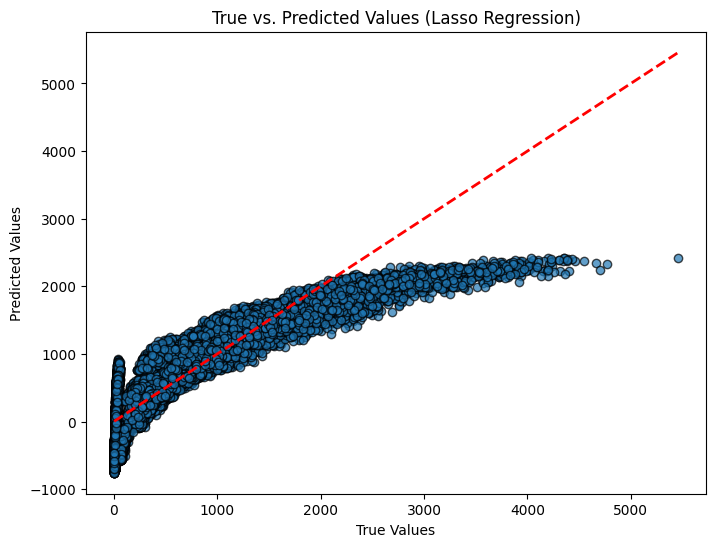

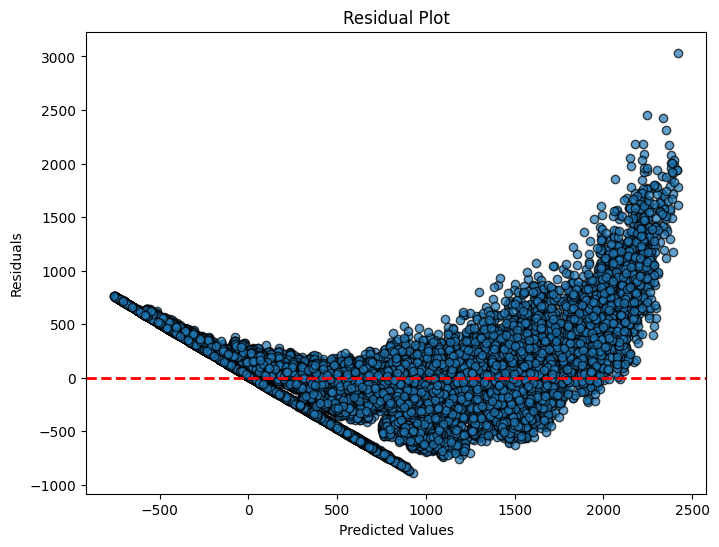

In [48]:
import matplotlib.pyplot as plt

# Scatter plot of true vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('True vs. Predicted Values (Lasso Regression)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [49]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [50]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("XGBRegressor Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


XGBRegressor Model Performance:
RMSE: 80.70
MAE: 47.74
R² Score: 0.99


In [52]:
#model optimization
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}


In [53]:
# Predictions
y_pred = grid_search.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Tuned XGBBRegressor RMSE: {rmse:.2f}")
print(f"Tuned XGBBRegressor R² Score: {r2:.2f}")

Tuned XGBBRegressor RMSE: 72.40
Tuned XGBBRegressor R² Score: 0.99


Prediction on Unseen Data

In [54]:
!gdown 1eFnD0MFwRzKUQ7vITQYJfKJosmLREjyS

Downloading...
From: https://drive.google.com/uc?id=1eFnD0MFwRzKUQ7vITQYJfKJosmLREjyS
To: /content/test.csv
100% 5.67M/5.67M [00:00<00:00, 43.4MB/s]


In [55]:
df1 = pd.read_csv('test.csv')

In [56]:
df1

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode
...,...,...,...,...,...
98545,328675,2019-12-31,Singapore,Premium Sticker Mart,Holographic Goose
98546,328676,2019-12-31,Singapore,Premium Sticker Mart,Kaggle
98547,328677,2019-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
98548,328678,2019-12-31,Singapore,Premium Sticker Mart,Kerneler


In [57]:
df1['date'] = pd.to_datetime(df1['date'])

In [58]:
# Extract features from the 'date' column
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month
df1['day_of_week'] = df1['date'].dt.dayofweek

# Adding Seasonality
df1['season'] = df1['month'].apply(lambda x:
                                     'Winter' if x in [12, 1, 2] else
                                     'Spring' if x in [3, 4, 5] else
                                     'Summer' if x in [6, 7, 8] else
                                     'Fall')


# Adding Holiday Indicator (example for Christmas and New Year's)
df1['is_holiday'] = df1['date'].isin(['2021-12-25', '2021-12-31', '2021-01-01']).astype(int)

# Adding Weekday vs. Weekend
df1['is_weekend'] = df1['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)


<ipython-input-58-54e41039b3c0>:15: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df1['is_holiday'] = df1['date'].isin(['2021-12-25', '2021-12-31', '2021-01-01']).astype(int)


In [59]:
X_test1 = df1.drop(['id', 'date'], axis=1)

In [60]:
encoded_array = ct_cat.transform(X_test1).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_test1 = pd.DataFrame(encoded_array, columns=encoded_col_names)

['country_Canada' 'country_Finland' 'country_Italy' 'country_Kenya'
 'country_Norway' 'country_Singapore' 'store_Discount Stickers'
 'store_Premium Sticker Mart' 'store_Stickers for Less'
 'product_Holographic Goose' 'product_Kaggle' 'product_Kaggle Tiers'
 'product_Kerneler' 'product_Kerneler Dark Mode' 'year_2010' 'year_2011'
 'year_2012' 'year_2013' 'year_2014' 'year_2015' 'year_2016' 'month_1'
 'month_2' 'month_3' 'month_4' 'month_5' 'month_6' 'month_7' 'month_8'
 'month_9' 'month_10' 'month_11' 'month_12' 'day_of_week_0'
 'day_of_week_1' 'day_of_week_2' 'day_of_week_3' 'day_of_week_4'
 'day_of_week_5' 'day_of_week_6' 'season_Fall' 'season_Spring'
 'season_Summer' 'season_Winter' 'is_holiday_0' 'is_weekend_0'
 'is_weekend_1']


In [61]:
# Predictions
y_pred = grid_search.predict(X_test1)

y_pred

array([ 142.7345 ,  856.96466,  748.96893, ..., 1555.8104 ,  904.94604,
        972.86584], dtype=float32)

In [73]:
test_ids = df1['id']

In [74]:
y_predict = pd.DataFrame({
    'id': test_ids,
    'num_sold': y_pred
})


In [1]:
y_predict

NameError: name 'y_predict' is not defined

In [ ]:
df2['num_sold'] = np.round(df2['prediction'].astype(float)).astype(int)

In [76]:
df1['y_pred'] = y_pred

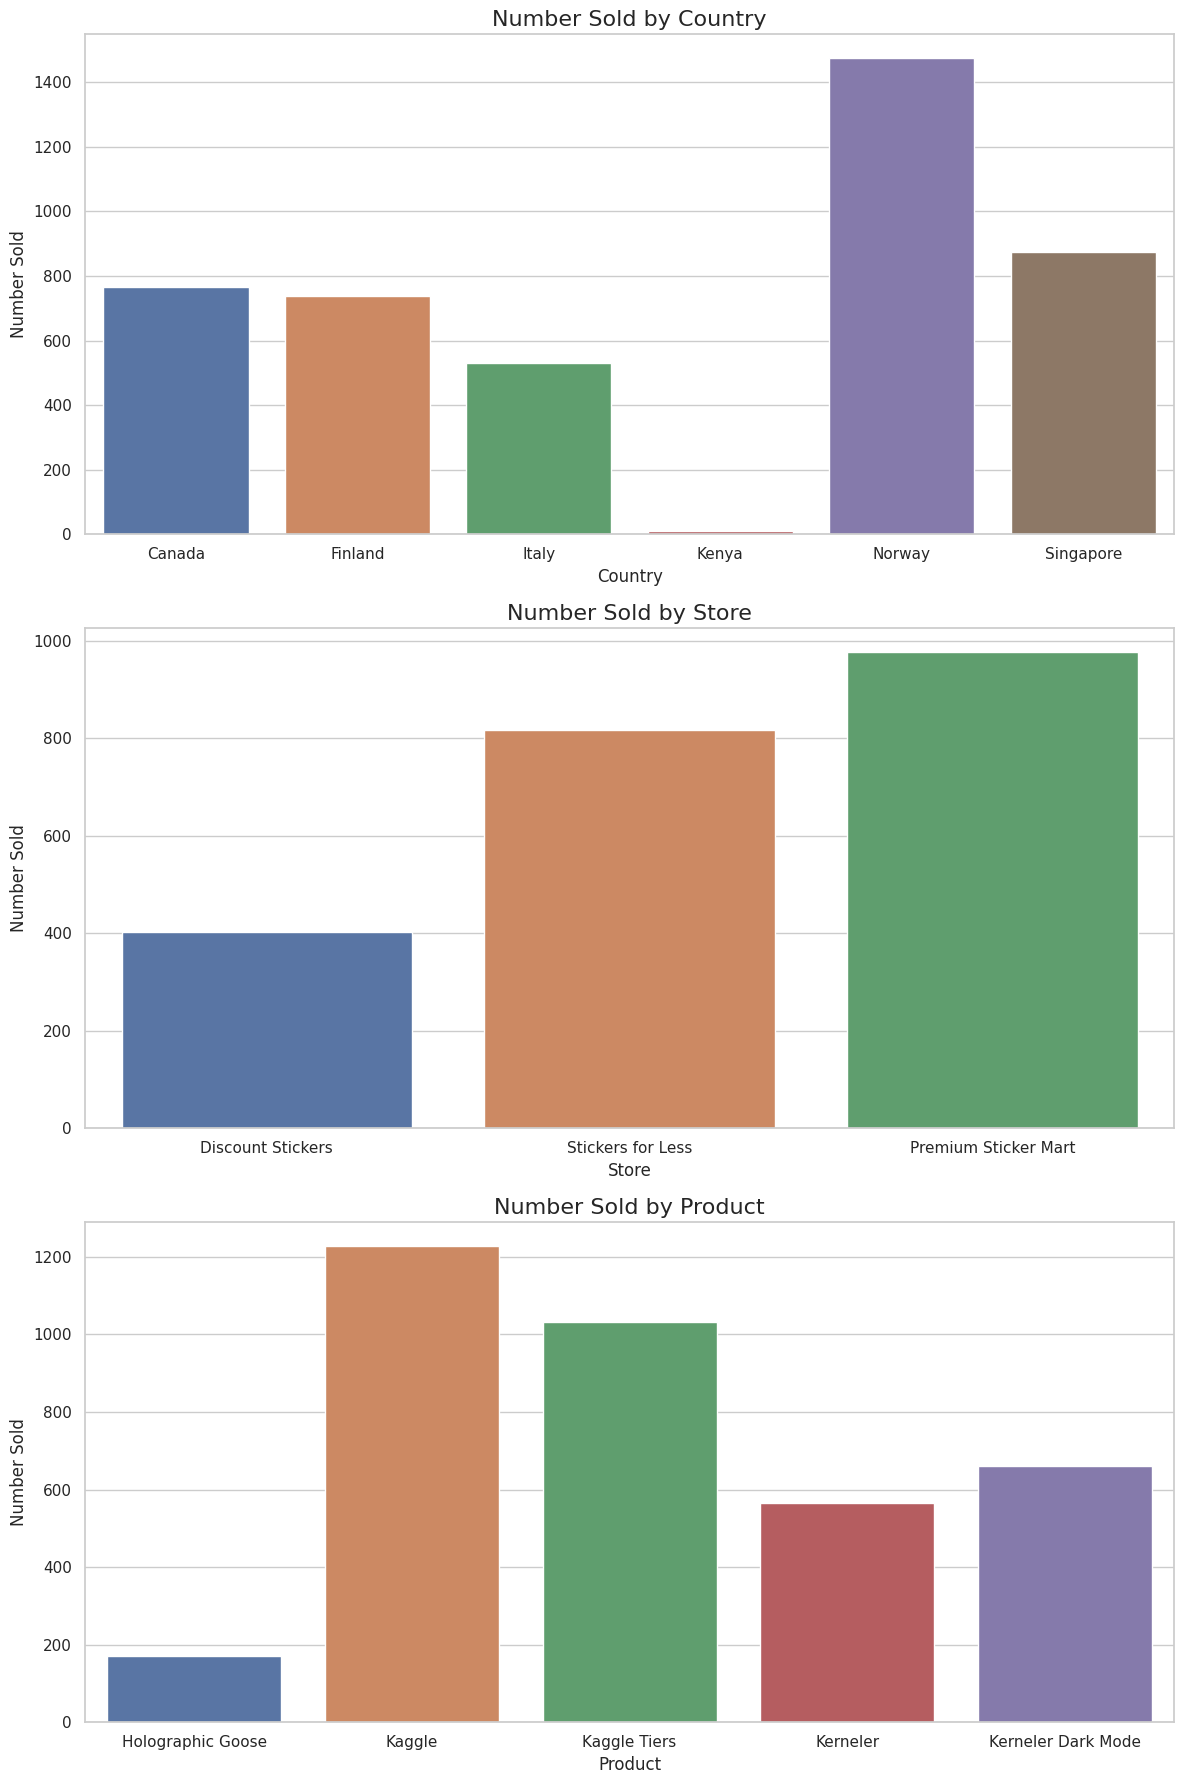

In [77]:
# Set plot style
sns.set(style="whitegrid")

# Create bar plots to compare num_sold across country, store, and product
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharey=False)

# Plot 1: num_sold by country
sns.barplot(data = df1, x='country', y='y_pred', errorbar=None, ax=axes[0], hue = 'country' , legend = False)
axes[0].set_title('Number Sold by Country', fontsize=16)
axes[0].set_xlabel('Country', fontsize=12)
axes[0].set_ylabel('Number Sold', fontsize=12)

# Plot 2: num_sold by store
sns.barplot(data = df1, x='store', y='y_pred', errorbar=None, ax=axes[1], hue = 'store' , legend = False)
axes[1].set_title('Number Sold by Store', fontsize=16)
axes[1].set_xlabel('Store', fontsize=12)
axes[1].set_ylabel('Number Sold', fontsize=12)

# Plot 3: num_sold by product
sns.barplot(data=df1, x='product', y='y_pred',errorbar=None, ax=axes[2], hue = 'product' , legend = False)
axes[2].set_title('Number Sold by Product', fontsize=16)
axes[2].set_xlabel('Product', fontsize=12)
axes[2].set_ylabel('Number Sold', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [78]:
y_predict.to_csv('submission2.csv', index=False)